<a href="https://colab.research.google.com/github/kerdokurs/ids_project/blob/master/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDS Project

2021 on andmed ainult kuni 30 aprillini


In [1]:
# Check for source in the README file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
# Import the weather data
# Check for source in the README file
#   - Use English translations for the columns
#   - Parse date as datetime
#   - Ignore the first row now that we have our own column names
#   - Parse all other columns automatically

weather_data = pd.read_csv(
  "data/weather_2019_2021.csv",
  names=["time", "temperature", "humidity", "pressure", "wind_speed", "wind_direction", "precipitation"],
  na_values=" ",
  parse_dates=["time"],
  skiprows=1,
)

In [3]:
# Clean the weather dataset

weather_data = weather_data.drop(columns=["pressure", "wind_direction"])

In [4]:
print(f"Dataset size: {weather_data.shape}")
print(weather_data.dtypes)
weather_data.head()

Dataset size: (266401, 5)
time             datetime64[ns]
temperature             float64
humidity                float64
wind_speed              float64
precipitation           float64
dtype: object


,time,temperature,humidity,wind_speed,precipitation
0,2019-05-01 01:00:00,7.360671,55.550208,3.354964,0.0
1,2019-05-01 01:05:00,7.293279,54.974023,3.265612,0.0
2,2019-05-01 01:10:00,7.094379,55.334567,3.135003,0.0
3,2019-05-01 01:15:00,6.909144,55.569861,2.840234,0.0
4,2019-05-01 01:20:00,6.864302,56.075395,2.822092,0.0


In [5]:
# Import bike data
bike_data_2019 = pd.read_csv("data/rattaringlus/2019.csv")
bike_data_2020 = pd.read_csv("data/rattaringlus/2020.csv")
bike_data_2021 = pd.read_csv("data/rattaringlus/2021.csv")

In [6]:
# Clean bike data by only including data in daterange may 1st to oct 31st
#bike_data_2019 = bike_data_2019[(bike_data_2019["unlockedat"] >= "2019-05-01") & (bike_data_2019["unlockedat"] <= "2019-10-31")]
#bike_data_2020 = bike_data_2020[(bike_data_2020["unlockedat"] >= "2020-05-01") & (bike_data_2020["unlockedat"] <= "2020-10-31")]
#bike_data_2021 = bike_data_2021[(bike_data_2021["unlockedat"] >= "2021-05-01") & (bike_data_2021["unlockedat"] <= "2021-10-31")]

bike_data_2019 = bike_data_2019.append(bike_data_2020)
bike_data = bike_data_2019.append(bike_data_2021)

bike_data = bike_data.sort_values(by="unlockedat")

In [7]:
# Import covid data
covid_data_raw = pd.read_csv("data/covid.csv")

In [8]:
# Clean covid data
covid_data_raw = covid_data_raw.sort_values(by="StatisticsDate")
#covid_data_2020 = covid_data_raw[(covid_data_raw["StatisticsDate"] >= "2020-05-01") & (covid_data_raw["StatisticsDate"] <= "2020-10-31")]
#covid_data_2021 = covid_data_raw[(covid_data_raw["StatisticsDate"] >= "2021-05-01") & (covid_data_raw["StatisticsDate"] <= "2021-10-31")]
covid_data = covid_data_raw[((covid_data_raw["StatisticsDate"] < "2021-05-01"))]
covid_data

,id,Gender,AgeGroup,Country,County,ResultValue,StatisticsDate,ResultTime,AnalysisInsertTime
0,4f75b2e3432a1134be12e4b0ca51e1b4d51ba36df48d70...,N,25-29,Eesti,Harju maakond,N,2020-02-05,2020-02-05 00:00:00,2020-03-21 20:30:00
1,c3485811d07059da2c5cfaea67680169f49673ec512846...,N,50-54,Eesti,Harju maakond,N,2020-02-06,2020-02-06 00:00:00,2020-03-21 20:30:00
2,d142bc15abf1e704a92aaaba7503374fcb11a4ff622b25...,N,40-44,Eesti,Harju maakond,N,2020-02-12,2020-02-12 00:00:00,2020-03-21 20:30:00
3,e6f3c417f9a36a2ef6d9597164f1c316e8ed37a51903fc...,N,35-39,Eesti,Harju maakond,N,2020-02-21,2020-02-21 00:00:00,2020-03-21 20:30:00
4,1d57b18361121db05e6f02f5f9940ef207525fb7127bd3...,M,25-29,Eesti,Pärnu maakond,N,2020-02-25,2020-02-25 00:00:00,2020-03-21 20:30:00
...,...,...,...,...,...,...,...,...,...
1291998,347e53aeee368480fdb7d97dc3cf4404111161d60d4fa1...,N,45-49,Eesti,Tartu maakond,N,2021-04-30,2021-04-30 08:00:00,2021-04-30 20:00:00
1291997,34401b82b9140f25080383ae74d9a62c43fe1747c7efbd...,M,45-49,Eesti,Harju maakond,N,2021-04-30,2021-04-30 14:00:00,2021-04-30 20:00:00
1291996,339504e43b142a0bff25f4c3b6727f3a6cc01ee1fd484c...,N,25-29,Eesti,Harju maakond,N,2021-04-30,2021-04-30 09:00:00,2021-04-30 20:00:00
1291995,32bf8760fc51106ed98662cfe4d26fc5c5923d5199517a...,M,15-19,Eesti,Harju maakond,N,2021-04-30,2021-04-30 19:00:00,2021-04-30 20:00:00


<ipython-input-9-516ba4b1e0e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data["StatisticsDate"] = covid_data["StatisticsDate"].astype(np.datetime64)
<ipython-input-9-516ba4b1e0e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['week_number_of_year']=covid_data["StatisticsDate"].dt.isocalendar().week
<ipython-input-9-516ba4b1e0e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

Text(0.5, 1.0, '2021')

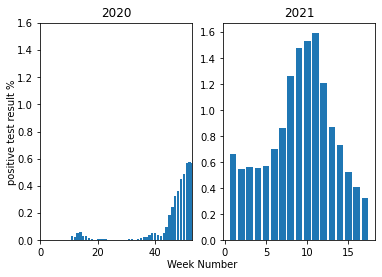

In [9]:
#VISUALISE DATA BY WEEK NUMBER AS PERCENTAGE
covid_data["StatisticsDate"] = covid_data["StatisticsDate"].astype(np.datetime64)
covid_data['week_number_of_year']=covid_data["StatisticsDate"].dt.isocalendar().week
covid_data["year"] = covid_data["StatisticsDate"].dt.isocalendar().year
"-------*******-------"
covid_counts20 = covid_data[covid_data["year"]==2020]
index = covid_counts20.index

number_of_rows = len(index)
covid_counts21 = covid_data[covid_data["year"]==2021]
index1 = covid_counts21.index

number_of_rows1 = len(index1)
"-------*******-------"
covid_datap = covid_data[covid_data.ResultValue == "P"]
nakatumiste_data = covid_datap.groupby(["week_number_of_year", "year"])["ResultValue"].value_counts().rename('count').to_frame().reset_index()
nakatumiste_data["year"]
year21=nakatumiste_data[nakatumiste_data["year"] == 2021]
year20=nakatumiste_data[nakatumiste_data["year"] == 2020]
"-------*******-------"
#plot code
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim(left=0, right=53)
ax1.set_ylim(bottom=0, top=1.6)
ax1.bar(year20["week_number_of_year"], year20["count"]/number_of_rows*100)

ax2.bar(year21["week_number_of_year"], year21["count"]/number_of_rows1*100)
fig.text(0.5, 0.04, 'Week Number', ha='center', va='center')
fig.text(0.06, 0.5, 'positive test result %', ha='center', va='center', rotation='vertical')

ax1.set_title('2020')
ax2.set_title('2021')

Text(0.5, 1.0, '2021')

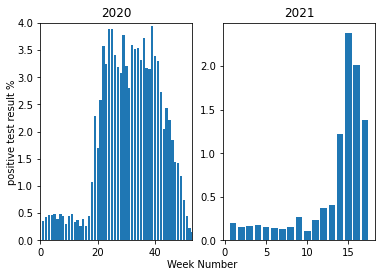

In [10]:
#same thing with bike data
bike_data_all_weeks = bike_data
bike_data_all_weeks["unlockedat"] = bike_data["unlockedat"].astype(np.datetime64)
bike_data_all_weeks["week_no_year"] = bike_data_all_weeks["unlockedat"].dt.isocalendar().week
bike_data_all_weeks["year"] = bike_data_all_weeks["unlockedat"].dt.isocalendar().year
"--------*******--------"
bc20 = bike_data_all_weeks[bike_data_all_weeks["year"]==2020]
bindex = bc20.index

bnumber_of_rows = len(bindex)
bc21 = bike_data_all_weeks[bike_data_all_weeks["year"]==2020]
bindex1 = bc21.index

bnumber_of_rows1 = len(bindex1)
"-------********--------"
# no of bike rides in 2020 and 2021
bike_by_week_year = bike_data_all_weeks.groupby(["week_no_year","year"]).size().rename('count').to_frame().reset_index()
byear20 = bike_by_week_year[bike_by_week_year["year"]== 2020]
byear21 = bike_by_week_year[bike_by_week_year["year"]== 2021]

fig, (ax1, ax2) = plt.subplots(1, 2)
#covid_counts[0] is the count of all covid tests in given time period
ax1.set_xlim(left=0, right=53)
ax1.set_ylim(bottom=0, top=4)
ax1.bar(byear20["week_no_year"], byear20["count"]/bnumber_of_rows*100)

ax2.bar(byear21["week_no_year"], byear21["count"]/bnumber_of_rows1*100)
fig.text(0.5, 0.04, 'Week Number', ha='center', va='center')
fig.text(0.06, 0.5, 'positive test result %', ha='center', va='center', rotation='vertical')

ax1.set_title('2020')
ax2.set_title('2021')


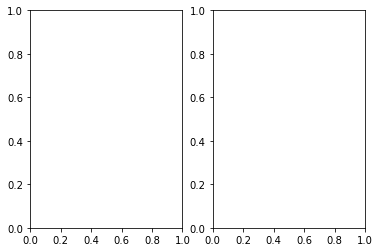

In [11]:
#same with weather
wwd = weather_data
wwd["time"] = weather_data["time"].astype(np.datetime64)
wwd["week"] = wwd["time"].dt.isocalendar().week
wwd["year"]=  wwd["time"].dt.isocalendar().year
wwd20 = wwd[wwd["year"] == 2020]
wwd21 = wwd[wwd["year"] == 2021]
fig, (ax1, ax2) = plt.subplots(1, 2)

In [12]:
# TODO: Weekly bikeride statistics piirangute ajal vs ilma piirangute ajal (2020 ja 2021)
# 2 tabelit kus on 7 bar-i (E-P) ja nendes päevades tehtud sõitude keskmine arv
# Cardo
# 0 - monday, 6 - sunday
bike_data_weekDays = bike_data
bike_data_weekDays["unlockedat"] = bike_data_weekDays["unlockedat"].astype(np.datetime64)
bike_data_weekDays["unlockedat_day"] = bike_data_weekDays["unlockedat"].dt.dayofweek

# eraldada non-piirangute ja piirangute aegsed s6idud (imo mõistlik on kokku liita need 2 lainet ning eraldi kokku liita kaks stabiilset aega ja ss võrrelda)




# leida nädalate arv antud dataframe-i daterange-is
non_laine_begin = min(bike_data_weekDays["unlockedat"]) # FIXME: see DF tuleks asendada DF-iga kus on sõidud sellisel ajal kus ei olnud koroonalainet
non_laine_end = max(bike_data_weekDays["unlockedat"])
non_laine_weeks = (non_laine_end - non_laine_begin).days / 7

laine_begin = min(bike_data_weekDays["unlockedat"]) # FIXME: see DF tuleks asendada DF-iga kus on sõidud sellisel ajal kus OLI koroonalaine
laine_end = max(bike_data_weekDays["unlockedat"])
laine_weeks = (laine_end - laine_begin).days / 7

# leida sõitude arvud nädalapäevade kaupa ning jagada kõik valued nädalate arvuga, et saada keskmine daily sõitude arv nädalate kaupa
non_covid_rides_count = bike_data_weekDays.shape[0]
# bike_data_weekDays.groupby(["unlockedat_day"])["unlockedat_day"].count()
# bike_data_weekDays.plot.bar(x = [0, 1, 2, 3, 4, 5, 6], y = bike_data_weekDays.groupby(by="unlockedat_day").mean())
# non_covid_rides_count

# visualiseerida

In [13]:
# TODO: Is there a difference between the statistics of the bike rides during and before covid
#eg 2019 and 2020/21

# --------------- Average distance pre covid
avg_dist_2019 = bike_data_2019["length"].mean()
avg_dist_2020 = bike_data_2020["length"].mean()
avg_dist_2021 = bike_data_2021["length"].mean()

avg_dist_increase = round((avg_dist_2021 / avg_dist_2019)*100 - 100, 2)

print("Average distance (km) before covid: " + str(avg_dist_2019))
print("Average distance (km) after covid (2020): " + str(avg_dist_2020))
print("Average distance (km) after covid (2021): " + str(avg_dist_2021))

print("The average distance is slowly rising, this is most likely due to people preferring biking, instead of sitting in a crowded bus and increasing their risk of catching the virus.")
print("The average distance of bikers has risen " + str(avg_dist_increase) + "% when comparing statistics from 2019 to 2021")

# --------------- Average age pre covid and post covid (are older people using more bikes to avoid other means of transportation?)

avg_age_2019 = bike_data_2019["yearOfBirth"].mean()
avg_age_2020 = bike_data_2020["yearOfBirth"].mean()
avg_age_2021 = bike_data_2021["yearOfBirth"].mean()

print("The average age of a person using citybikes in 2019 was: " + str(2021 - avg_age_2019))
print("The average age of a person using citybikes in 2020 was: " + str(2021 - avg_age_2020))
print("The average age of a person using citybikes in 2021 was: " + str(2021 - avg_age_2021))

print("It appears that more and more older people are using citybikes to get around the city, most likely to avoid public transport whenever possible.")

# --------------- "Fun facts" aka longest distance driven, longest duration of unlocked bike
longest_distance = max([max(bike_data_2019["length"]), max(bike_data_2020["length"]), max(bike_data_2021["length"])])
print("Longest distance driven in the years 2019-2021 was " + str(longest_distance) + "km")

#cast unlockedattime and lockedattime columns to datetime
bike_data_2019["unlockedAtTimestamp"] = pd.to_datetime(bike_data_2019["unlockedat"] + " " + bike_data_2019["unlockedattime"], utc=True)
bike_data_2020["unlockedAtTimestamp"] = pd.to_datetime(bike_data_2020["unlockedat"] + " " + bike_data_2020["unlockedattime"], utc=True)
bike_data_2021["unlockedAtTimestamp"] = pd.to_datetime(bike_data_2021["unlockedat"] + " " + bike_data_2021["unlockedattime"], utc=True)

bike_data_2019["lockedAtTimestamp"] = pd.to_datetime(bike_data_2019["lockedat"] + " " + bike_data_2019["lockedattime"], utc=True)
bike_data_2020["lockedAtTimestamp"] = pd.to_datetime(bike_data_2020["lockedat"] + " " + bike_data_2020["lockedattime"], utc=True)
bike_data_2021["lockedAtTimestamp"] = pd.to_datetime(bike_data_2021["lockedat"] + " " + bike_data_2021["lockedattime"], utc=True)

bike_data_2019["rideDuration"] = bike_data_2019["lockedAtTimestamp"] - bike_data_2019["unlockedAtTimestamp"]
bike_data_2020["rideDuration"] = bike_data_2020["lockedAtTimestamp"] - bike_data_2020["unlockedAtTimestamp"]
bike_data_2021["rideDuration"] = bike_data_2021["lockedAtTimestamp"] - bike_data_2021["unlockedAtTimestamp"]

longest_ride = max([max(bike_data_2019["rideDuration"]), max(bike_data_2020["rideDuration"]), max(bike_data_2021["rideDuration"])])
print("Longest ride of the three years was: " + str(longest_ride))




Average distance (km) before covid: 2.6539883433710036
Average distance (km) after covid (2020): 2.66533069727447
Average distance (km) after covid (2021): 2.8012340595737073
The average distance is slowly rising, this is most likely due to people preferring biking, instead of sitting in a crowded bus and increasing their risk of catching the virus.
The average distance of bikers has risen 5.55% when comparing statistics from 2019 to 2021
The average age of a person using citybikes in 2019 was: 30.988374422187917
The average age of a person using citybikes in 2020 was: 30.85136217436684
The average age of a person using citybikes in 2021 was: 33.085261402827655
It appears that more and more older people are using citybikes to get around the city, most likely to avoid public transport whenever possible.
Longest distance driven in the years 2019-2021 was 161.83km
Longest ride of the three years was: 15 days 20:37:08


In [ ]:
# TODO: Does the last 7 day data have any impact on no of bike rides
# also take weather into account
# Agnes 